62846
62363
6310
        StockID StockName       公布日 备注       截止日  比上年同期增长上限(%)  比上年同期增长下限(%)  \
28804  SZ002359     *ST北讯  20190427     20181231     -575.4646     -813.1968   
35221  SZ002565      顺灏股份  20150425     20141231     -119.3500     -125.0600   

      比上年同期增长数据来源     盈利金额上限     盈利金额下限  ...  \
28804        天软计算 -103475.97 -155213.95  ...   
35221       公告中公布   -4435.45   -5745.00  ...   

                                                    预警详情 types INITIAL_ID  \
28804  1、公司债务逾期导致诉讼事项及公司银行账户被冻结，对公司的正常运行、经营管理造成了一定的不利...   Bad   106674.0   
35221  造成2014年年度业绩预告出现差异的主要原因，由于公司发现控股子公司浙江德美彩印有限公司(以...   Bad    43718.0   

      publish_date  end_date  n_income_surprise  notice_type  pred_spec_ret  \
28804     20181022  20181231           1.111208         盈利增加       0.000627   
35221     20141020  20141231           0.850779         盈利增加      -0.004492   

       pred_group notice_type_combine  
28804         2.0                  预喜  
35221         3.0                  预喜  

[2 row

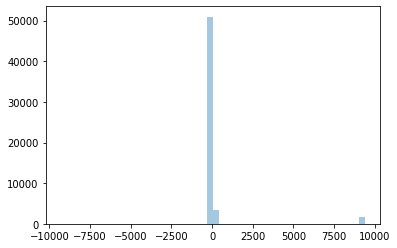

56053
count    56053.000000
mean       294.827966
std       1585.345103
min      -9294.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       9405.000000
dtype: float64


In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import pickle
import seaborn as sns

F1 = open(r'C:\\Users\\win\\Downloads\\FastFinancialReport.pkl', 'rb')
F2 = open(r'C:\\Users\\win\\Downloads\\ForcastFinancialReport.pkl', 'rb')
F3 = open(r'C:\\Users\\win\\Downloads\\event_1106.pkl', 'rb')
kb = pickle.load(F1)
yb = pickle.load(F2)
bg = pickle.load(F3)
yb = yb[yb["预警类型"] != ""]
types = yb["预警类型"].unique()
yb["types"] = np.nan
yb.loc[yb["预警类型"].isin(["预增","预盈","减亏"]), "types"] = "Good"
yb.loc[yb["预警类型"].isin(["预减","预亏","增亏"]), "types"] = "Bad"
yb.loc[yb["预警类型"].isin(["预平","预警"]), "types"] = "Not Sure"
yb = yb[(yb["公布日"] >= 20110103) & (yb["公布日"] <= 20191224)]
xx = pd.merge(yb, bg, left_on=["StockID", "截止日"], right_on=["StockID", "end_date"], how="outer")
print(len(xx))
print(xx["StockName"].count())
print(len(xx[np.isnan(xx["INITIAL_ID"])]))
xx = pd.merge(yb, bg, left_on=["StockID", "截止日"], right_on=["StockID", "end_date"], how="inner")
diff = xx["公布日"] - xx["publish_date"]
print(xx.loc[diff.index[diff == max(diff)], :])
print(xx.loc[diff.index[diff == min(diff)], :])
print(yb[(yb["截止日"] == 20171231) & (yb["StockID"] == "SZ002568")])
print(bg[(bg["end_date"] == 20171231) & (bg["StockID"] == "SZ002568")])
sns.distplot(diff.values, kde=False)
plt.show()
print(len(xx))
print(diff.describe())

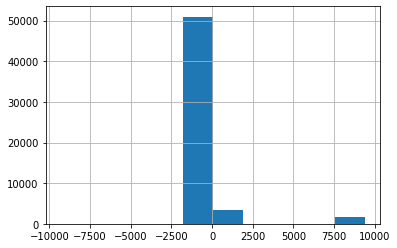

In [74]:
diff.hist()